# Plotnine flipbook

Stolen 150% from the ggplot flipbook – https://evamaerey.github.io/ggplot_flipbook/ggplot_flipbook_xaringan.html – and converted to plotnine.

You might also find [my plotnine reference](https://jsoma.github.io/plotnine-reference/) useful.

In [11]:
!pip install plotnine

In [12]:
# Necessary imports
import pandas as pd
from plotnine import *

# I don't think we use these?
# from mizani.breaks import date_breaks
# from mizani.formatters import date_format

In [ ]:
# make scatterplot with gdp on x axis and life expect
# on y axis and colored based on continent

In [40]:
df = pd.read_csv('countries.csv')
df.head()

,country,continent,gdp_per_capita,life_expectancy,population
0,Afghanistan,Asia,663,54.863,22856302
1,Albania,Europe,4195,74.200,3071856
2,Algeria,Africa,5098,68.963,30533827
3,Angola,Africa,2446,45.234,13926373
4,Antigua and Barbuda,N. America,12738,73.544,77656


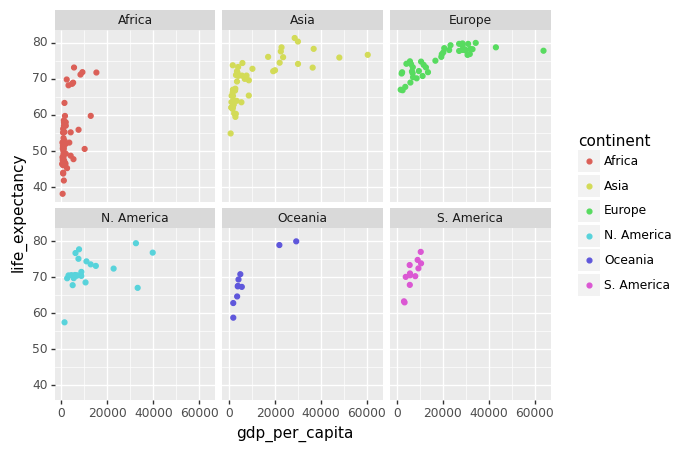

<ggplot: (696139897)>

In [46]:
(
    ggplot(df)
    + aes(x='gdp_per_capita')
    + aes(y='life_expectancy')
    + facet_wrap('continent')
    + geom_point()
    + aes(color='continent')
    # + geom_smooth(method='lm', se=False)
    # + scale_color_manual(values = ['blue','red','green','orange'])
    # + ylim([0,35])
    # + labs(
    #     color='',
    #     title='What color are your leaves?',
    #     y='Trees sold (m)',
    #     x='',
    # )
    # + theme_bw()
)

In [47]:
!pip install altair

In [50]:
import pandas as pd
import altair as alt
df = pd.read_csv('countries.csv')
df.head()

,country,continent,gdp_per_capita,life_expectancy,population
0,Afghanistan,Asia,663,54.863,22856302
1,Albania,Europe,4195,74.200,3071856
2,Algeria,Africa,5098,68.963,30533827
3,Angola,Africa,2446,45.234,13926373
4,Antigua and Barbuda,N. America,12738,73.544,77656


In [51]:
alt.Chart(df).mark_circle().encode(
    x='gdp_per_capita',
    y='life_expectancy',
    color='continent'
)

alt.Chart(...)

In [13]:
# from pandas import *
# pd.read_csv -> read_csv
# pd.to_datetime -> to_datetime
# pd.read_csv
# ggplot()
# import plotnine as p9
# p9.gglot()
# from plotnine import *
# ggplot()

# Christmas trees

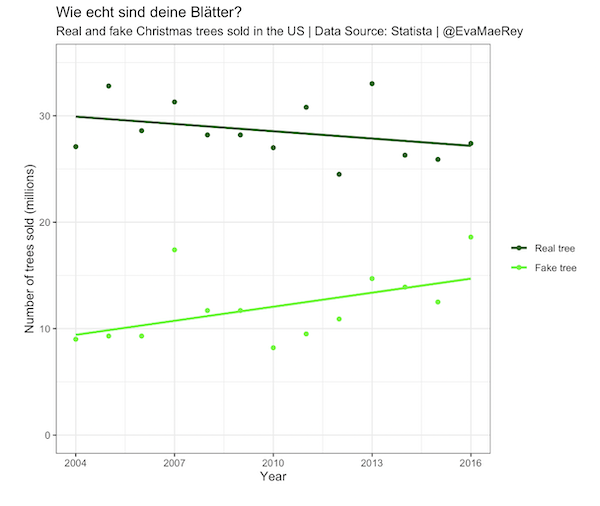

[Start here](https://evamaerey.github.io/ggplot_flipbook/ggplot_flipbook_xaringan.html#11)

This data is in **long** or **tidy** format.

In [14]:
df = pd.read_excel("Christmas tree sales.xlsx")
df.head()

,Year,Number of trees sold,Type of tree
0,2004,27100000.0,Real tree
1,2005,32800000.0,Real tree
2,2006,28600000.0,Real tree
3,2007,31300000.0,Real tree
4,2008,28200000.0,Real tree


In [15]:
df['Number of trees sold (millions)'] = df['Number of trees sold'] / 1000000
df = df.drop(columns=['Number of trees sold'])
df.head()

,Year,Type of tree,Number of trees sold (millions)
0,2004,Real tree,27.1
1,2005,Real tree,32.8
2,2006,Real tree,28.6
3,2007,Real tree,31.3
4,2008,Real tree,28.2


In [9]:
df['Type of tree'].value_counts()

Real tree    13
Fake tree    13
Name: Type of tree, dtype: int64

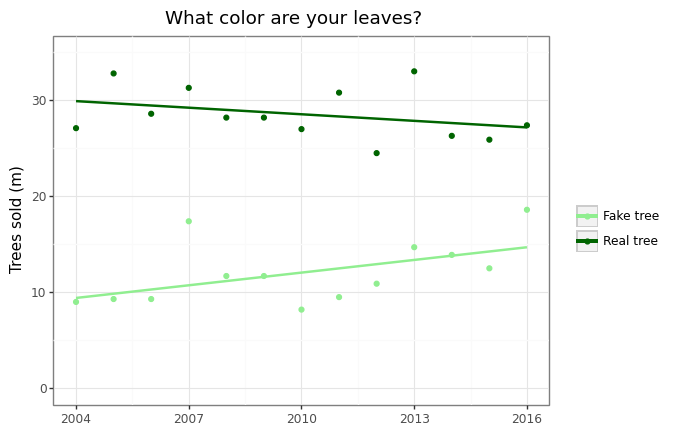

<ggplot: (695865678)>

In [39]:
(
    ggplot(df)
    + aes(x='Year')
    + aes(y='Number of trees sold (millions)')
    + geom_point()
    + aes(color='Type of tree')
    + geom_smooth(method='lm', se=False)
    + scale_color_manual(values = ['lightgreen', 'darkgreen'])
    + ylim([0,35])
    + labs(
        color='',
        title='What color are your leaves?',
        y='Trees sold (m)',
        x='',
    )
    + theme_bw()
)

# MLB Ethnicities

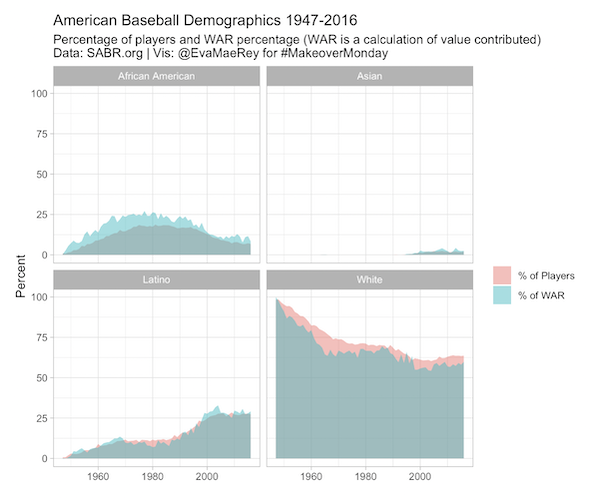

[Start here](https://evamaerey.github.io/ggplot_flipbook/ggplot_flipbook_xaringan.html#24)

This data is **not** in long/tidy format. There are **two measurements** in each row!

In [26]:
df = pd.read_excel("MLB Ethnicity 1947-2016.xlsx")
df.head()

,Year,% of Players,Ethnicity,% of WAR
0,1947,0.983,White,0.999
1,1948,0.985,White,0.976
2,1949,0.966,White,0.939
3,1950,0.953,White,0.910
4,1951,0.943,White,0.867


So we convert it! This process is called **reshaping** and usually involves [`pd.melt`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) or [`df.pivot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html). Those documents aren't easy to read or understand, though, so I prefer looking at the [pandas guide to reshaping].

# Olympic Winter Games Medals

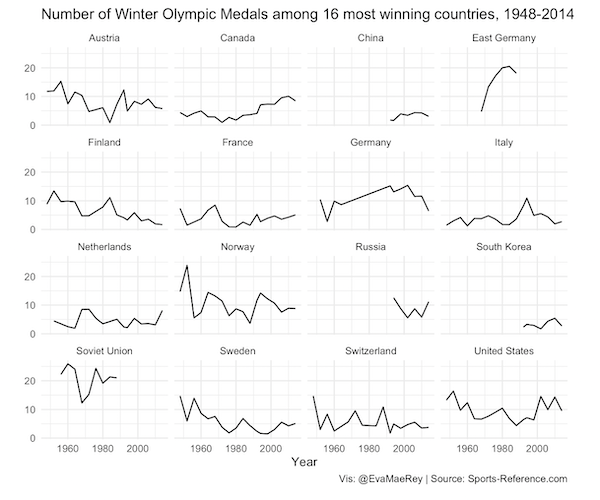

[Start here](https://evamaerey.github.io/ggplot_flipbook/ggplot_flipbook_xaringan.html#85)

Our final visualization is by **country** and **year**, so we need to reshape.

In [126]:
df = pd.read_csv("athlete_events.csv")

# Only winter!
df = df[(df.Season == 'Winter') & df.Medal.notnull()]

# Only post-1940!
df = df[df.Year > 1940]

# Okay good to go
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
61,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver
64,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze


In [1]:
# Run this after the crosstab we'll do in the cell above

# # Only a few countries!
# countries = ['Austria', 'Canada', 'Germany', 'China', 
#              'Finland', 'France', 'Italy', 'Netherlands', 
#              'Norway', 'Russia', 'United States', 'Sweden']
# df = df[df.Team.isin(countries)]
# df.head()

# Olympic Winter Games (athletes edition)

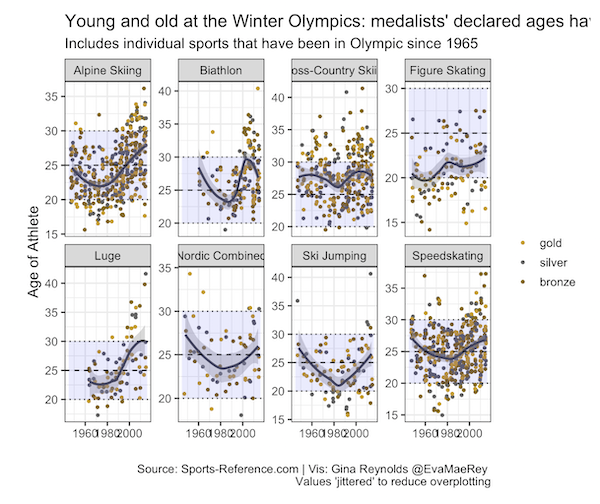

[Start here](https://evamaerey.github.io/ggplot_flipbook/ggplot_flipbook_xaringan.html#95)

This one is just **athletes**, so we don't need to change anything.

In [139]:
df = pd.read_csv("athlete_events.csv")

# Only winter!
df = df[(df.Season == 'Winter') & df.Medal.notnull()]

# Only post-1940!
df = df[df.Year > 1940]

# Okay good to go
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
61,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver
64,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze
